# Agent 3

Develop the code for an agent that emulates the intuitive policy of:  *Turn up the heat really hot, then turn it down low to accelerate the heating of the griddle*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
import GridSimulator

## Develop the methodology of hot then cold

This agent is supposed to turn up the *hot side* to a specific temperature (`temperatureHot`) for a specific amount of time (`timeHot`).  After that time, turn the temperature down to a specific temperature (`temperatureCold`) and complete the simulation and score the results

In [2]:
temperatureHot = 500
temperatureCold = 25
timeHot = 400
timeCold = 600

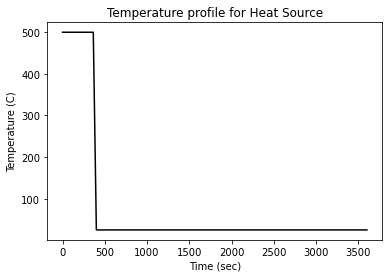

In [3]:
timeTest = np.linspace(0, 3600, 100)

temperatureHeatSourceProfile = np.ones(timeTest.shape)*temperatureCold

isHot = timeTest < timeHot
temperatureHeatSourceProfile[isHot] = temperatureHot

plt.figure()
plt.plot(timeTest, temperatureHeatSourceProfile, '-k')
plt.xlabel("Time (sec)")
plt.ylabel("Temperature (C)")
plt.title("Temperature profile for Heat Source")
plt.show()

In [6]:
class ClassAgent3: 
#     temperatureHot = 300
#     temperatureCold = 100
#     timeHot = 60
    
    def temperatureProfile(self, timeAssess):
        temperatureResult = self.temperatureCold
        if(timeAssess < self.timeHot):
            temperatureResult = self.temperatureHot
        return temperatureResult
    
    def runSimulation(self, timeTotal, timeHot, timeCold, temperatureHot, temperatureCold, objHeatSimulator):
        score = 0
        
        # run simulation with temperature profile
        
        dTimeRecommend = objHeatSimulator.SuggestedTimeInc(True)
        
        # run the simulator for the hot temperature for a duration of hot time
        timeStart = 0
        timeEnd = timeHot
        noStepsMin =( timeEnd - timeStart)/dTimeRecommend
        noSteps = int(np.ceil(noStepsMin*1.2))
        timeSequence = np.linspace(timeStart, timeEnd, noSteps)
        dTimeLinspace = timeSequence[1] - timeSequence[0]

        objHeatSimulator.TimeInc = dTimeLinspace
        objHeatSimulator.SetHeatSource(temperatureHot)
        objHeatSimulator.CreateDF()
        objHeatSimulator.AdvanceSimulationByTime(timeHot, temperatureHot)
        
        timeStart = 0
        timeEnd = timeCold
        noStepsMin =( timeEnd - timeStart)/dTimeRecommend
        noSteps = int(np.ceil(noStepsMin*1.2))
        timeSequence = np.linspace(timeStart, timeEnd, noSteps)
        dTimeLinspace = timeSequence[1] - timeSequence[0]

        objHeatSimulator.TimeInc = dTimeLinspace
        
        objHeatSimulator.SetHeatSource(temperatureCold)
        objHeatSimulator.AdvanceSimulationByTime(timeCold, temperatureCold)
        
        # run the simulator for the const temperature until the end of the total time
        timeStart = timeHot + timeCold
        timeEnd = timeTotal
        noStepsMin =( timeEnd - timeStart)/dTimeRecommend
        noSteps = int(np.ceil(noStepsMin*1.2))
        timeSequence = np.linspace(timeStart, timeEnd, noSteps)
        dTimeLinspace = timeSequence[1] - timeSequence[0]

        objHeatSimulator.TimeInc = dTimeLinspace

        objHeatSimulator.SetHeatSource(135)
        objHeatSimulator.AdvanceSimulationByTime((timeTotal-timeHot-timeCold), 133)

        #Evaluate the score of the simulation
        self.objHeatSimulator = objHeatSimulator
        
        isTemperatureGoodForCooking = (objHeatSimulator.AllTemp.Node10 > 130) & \
            (objHeatSimulator.AllTemp.Node10 < 135)
        
        scoreOverTime = -np.ones(isTemperatureGoodForCooking.shape)
        scoreOverTime[isTemperatureGoodForCooking] = 1.0
        
        scoreIntegral = np.trapz(scoreOverTime, objHeatSimulator.AllTemp.Time.to_numpy())
        score = scoreIntegral / np.max(objHeatSimulator.AllTemp.Time)
        
        return score
    

#  Test the Agent Class

Make sure that temperature vs. time looks right for the heater and the simulator

-0.03439701897018122


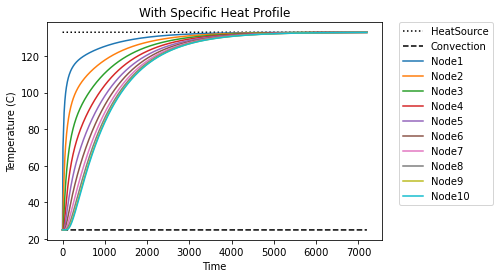

In [8]:
numberNodes = 10
thicknessTotal = 0.1
widthBar = 0.003
thicknessBar = 0.003

materialDensity = 7800
materialSpecificHeat = 500
materialThermalConductivity = 16.2

convectionCoefficient = 4
convectionTemperature = 25

temperatureHeatSource = 25
temperatureInitialIsothermal = 25
doesSurfaceTemperatureAllowConvection = False

objHeatSimulator = GridSimulator.ClassHeatSimulation()
objHeatSimulator.SetSize(widthBar,thicknessBar)
objHeatSimulator.SetNodes(numberNodes,thicknessTotal)
objHeatSimulator.SetMaterialProperties(materialDensity,materialSpecificHeat,materialThermalConductivity)
objHeatSimulator.SetConvectionProperties(convectionCoefficient,convectionTemperature)
objHeatSimulator.EnableSurfaceHeatTransfer(doesSurfaceTemperatureAllowConvection)
objHeatSimulator.SetHeatSource(temperatureHeatSource)
objHeatSimulator.SetInitalTemp(temperatureInitialIsothermal)
objHeatSimulator.UpdatePropertiesTable()

timeTotal = 7200

objAgent = ClassAgent3()
score = objAgent.runSimulation(timeTotal, 10,10, 133, 133, objHeatSimulator)
print(score)
objAgent.objHeatSimulator.GraphResults("With Specific Heat Profile")

0.14090598574643884


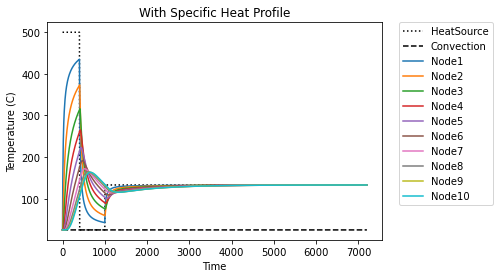

In [7]:
numberNodes = 10
thicknessTotal = 0.1
widthBar = 0.003
thicknessBar = 0.003

materialDensity = 7800
materialSpecificHeat = 500
materialThermalConductivity = 16.2

convectionCoefficient = 4
convectionTemperature = 25

temperatureHeatSource = 25
temperatureInitialIsothermal = 25
doesSurfaceTemperatureAllowConvection = False

objHeatSimulator = GridSimulator.ClassHeatSimulation()
objHeatSimulator.SetSize(widthBar,thicknessBar)
objHeatSimulator.SetNodes(numberNodes,thicknessTotal)
objHeatSimulator.SetMaterialProperties(materialDensity,materialSpecificHeat,materialThermalConductivity)
objHeatSimulator.SetConvectionProperties(convectionCoefficient,convectionTemperature)
objHeatSimulator.EnableSurfaceHeatTransfer(doesSurfaceTemperatureAllowConvection)
objHeatSimulator.SetHeatSource(temperatureHeatSource)
objHeatSimulator.SetInitalTemp(temperatureInitialIsothermal)
objHeatSimulator.UpdatePropertiesTable()

timeTotal = 7200

objAgent = ClassAgent3()
score = objAgent.runSimulation(timeTotal, timeHot,timeCold, temperatureHot, temperatureCold, objHeatSimulator)
print(score)
objAgent.objHeatSimulator.GraphResults("With Specific Heat Profile")

In [67]:
class ClassAllOptions():
    def __init__(self):
        self.objHeatSimulator = GridSimulator.ClassHeatSimulation()
        self.objAgent = ClassAgent3()
        self.reset()
        # space (x3) discretes:  one for time, tempHot, tempCold
   #     self.action_space = MultiDiscrete([ 9, 3, 3 ])
        self.listTimeHot = np.array([60, 120, 180, 240, 300])
        self.listTimeCold = np.array([60, 120, 180, 240, 300])   
        self.listTemperatureHot = np.array([200, 350, 500])
        self.listTemperatureCold = np.array([25, 100, 135]) 
        self.timeTotal = 3600

    def step(self, setting):
        #  An action is to run the entire simulation with the (x3) parameters that are chosen
        timeHot = self.listTimeHot[setting[0]]
        timeCold = self.listTimeHot[setting[1]]
        temperatureHot = self.listTemperatureHot[setting[2]]
        temperatureCold = self.listTemperatureCold[setting[3]]
        score = self.objAgent.runSimulation(self.timeTotal, timeHot, timeCold, temperatureHot, temperatureCold, self.objHeatSimulator)
        return score
    def attempt(self):
        SettingNum = 0
        #settings max = ([5,5,3,3])
        Settings = np.array([0,0,0,0])
#         Settings[3] += 1
#         print(Settings)
        x = 0
        while Settings[0] <= 4:
            Settings[1] = 0
            while Settings[1] <= 4:
                Settings[2] = 0
                while Settings[2] <= 2:
                    Settings[3] = 0
                    while Settings[3] <= 2:
                        self.Simulate(Settings)
                        Settings[3] += 1
                    Settings[2] += 1
                Settings[1] += 1
            Settings[0] += 1
    def Simulate(self,Settings):
        print(Settings)
        Score = self.step(Settings)
        print("Score: " + str(Score))
        self.objAgent.objHeatSimulator.GraphResults("Settings:" + str(Settings))
        Node10Temps = self.objAgent.objHeatSimulator.AllTemp.Node10
    def decodeSettings(self, Settings, Value):
        if Value == 0:
            Meaning = self.listTimeHot[Settings[0]]
        if Value == 1:
            Meaning = self.listTimeCold[Settings[1]]
        if Value == 2:
            Meaning = self.listTemperatureHot[Settings[2]]
        if Value == 3:
            Meaning = self.listTemperatureCold[Settings[3]]
        return Meaning
    def reset(self):
        numberNodes = 10
        thicknessTotal = 0.1
        widthBar = 0.003
        thicknessBar = 0.003
        
        materialDensity = 7800
        materialSpecificHeat = 500
        materialThermalConductivity = 16.2

        convectionCoefficient = 4
        convectionTemperature = 25

        temperatureHeatSource = 25
        temperatureInitialIsothermal = 25
        doesSurfaceTemperatureAllowConvection = False
        
        self.objHeatSimulator.SetSize(widthBar,thicknessBar)
        self.objHeatSimulator.SetNodes(numberNodes,thicknessTotal)
        self.objHeatSimulator.SetMaterialProperties(materialDensity,materialSpecificHeat,materialThermalConductivity)
        self.objHeatSimulator.SetConvectionProperties(convectionCoefficient,convectionTemperature)
        self.objHeatSimulator.EnableSurfaceHeatTransfer(doesSurfaceTemperatureAllowConvection)
        self.objHeatSimulator.SetHeatSource(temperatureHeatSource)
        self.objHeatSimulator.SetInitalTemp(temperatureInitialIsothermal)
        self.objHeatSimulator.UpdatePropertiesTable()
        
        self.objAgent = ClassAgent3()

In [68]:
Object = ClassAllOptions()

In [ ]:
Object.attempt()